# Optimal Skills

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create a list of SEA countries
SEA_countries = ['Vietnam', 'Thailand','Malaysia','Philippines','Indonesia','Laos','Cambodia','Myanmar','Singapore','Brunei', 'West Timor']

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## What is the most optimal skill to learn for Data Analysts (Highly sought-after and Well-paid) ?

### Methodology

- Group skills to determine median salary and likelihood of being in a job posting
- Visualize median salary vs percent skill demand
- (Optional) Determine if certain technologies are more prevalent

1. Group skills to determine median salary and likelihood of being in a job posting

In [3]:
df_DA_SEA = df[
    (df['job_title_short'] == "Data Analyst") &
    (df['job_country'].isin(SEA_countries))
    ].copy()


In [8]:
df_DA_SEA = df_DA_SEA.dropna(subset=['salary_year_avg'])

df_DA_SEA_exploded = df_DA_SEA.explode('job_skills')

df_DA_skills = df_DA_SEA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).copy()

df_DA_skills = df_DA_skills.rename(columns= {'count':'skill_count','median':'median_salary'})

DA_job_count = len(df_DA_SEA) # equivalent to countrows()

df_DA_skills['skill_perc'] = 100 * df_DA_skills['skill_count']/DA_job_count

df_DA_skills

,skill_count,median_salary,skill_perc
job_skills,,,
sql,62,99500.0,61.386139
python,42,99500.0,41.584158
tableau,36,100500.0,35.643564
excel,34,100500.0,33.663366
r,24,98500.0,23.762376
power bi,23,98500.0,22.772277
spark,8,130414.0,7.920792
word,8,89850.0,7.920792
sql server,8,87025.0,7.920792


In [9]:
min_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_perc']>5]
df_DA_skills_high_demand

,skill_count,median_salary,skill_perc
job_skills,,,
sql,62,99500.0,61.386139
python,42,99500.0,41.584158
tableau,36,100500.0,35.643564
excel,34,100500.0,33.663366
r,24,98500.0,23.762376
power bi,23,98500.0,22.772277
spark,8,130414.0,7.920792
word,8,89850.0,7.920792
sql server,8,87025.0,7.920792


2. Visualize median salary vs percent skill demand

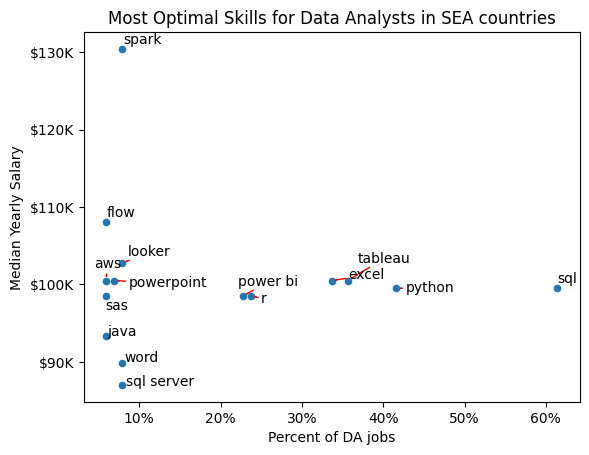

In [21]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(
    kind='scatter',
    x = 'skill_perc',
    y='median_salary'
)

# Prepare texts for adjustText
texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_perc'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlaps
adjust_text(texts,arrowprops=dict(arrowstyle='->',color = 'red'))

# Set axis labels, title
plt.xlabel('Percent of DA jobs') 
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in SEA countries')

# Format X&Y axes' tick values
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'{int(x)}%'))

3. Categorize the skills by tech type using different colors

In [32]:
df_tech_type = df['job_type_skills'].copy()
df_tech_type = df_tech_type.drop_duplicates()
df_tech_type = df_tech_type.dropna()

# combine all dicitonaries into one 
tech_dict = {}

for row in df_tech_type:
    row_dict = ast.literal_eval(row) # convert text type to dict type
    for key, value in row_dict.items():
        if key in tech_dict: 
            tech_dict[key] += value # if key already exists in tech_dict, add value to existing key
        else:
            tech_dict[key] = value # if key not exists yet, add key and value to the dict


# remove duplicated 'values' in the dict by converting values to 'set' type and then back to 'list' type
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict

{'analyst_tools': ['excel',
  'microstrategy',
  'ssrs',
  'powerbi',
  'power bi',
  'ms access',
  'sap',
  'looker',
  'visio',
  'nuix',
  'cognos',
  'ssis',
  'outlook',
  'sharepoint',
  'sas',
  'tableau',
  'powerpoint',
  'qlik',
  'datarobot',
  'msaccess',
  'alteryx',
  'spreadsheet',
  'dax',
  'esquisse',
  'word',
  'sheets',
  'spss',
  'splunk'],
 'programming': ['elixir',
  'ocaml',
  'visualbasic',
  'assembly',
  'no-sql',
  'apl',
  'c',
  'html',
  'powershell',
  'mongodb',
  'r',
  'solidity',
  'nosql',
  'go',
  'java',
  'ruby',
  'lua',
  'rust',
  'mongo',
  'vb.net',
  'bash',
  'perl',
  'javascript',
  'objective-c',
  'golang',
  'c#',
  'julia',
  'python',
  'matlab',
  'kotlin',
  'haskell',
  'sql',
  'crystal',
  'lisp',
  'erlang',
  'cobol',
  'vba',
  'php',
  'sass',
  'dart',
  'fortran',
  'c++',
  'visual basic',
  'css',
  'groovy',
  'typescript',
  't-sql',
  'f#',
  'clojure',
  'shell',
  'scala',
  'pascal',
  'delphi',
  'swift',
  '

In [36]:
# Create a new df using the tech_dict dictionary
df_tech = pd.DataFrame(list(tech_dict.items()), columns= ['technology','skills'])
df_tech = df_tech_type.explode('skills')

df_tech

,technology,skills
0,analyst_tools,excel
0,analyst_tools,microstrategy
0,analyst_tools,ssrs
0,analyst_tools,powerbi
0,analyst_tools,power bi
...,...,...
9,sync,unify
9,sync,webex
9,sync,wire
9,sync,ringcentral


In [42]:
# merge the df_tech table with the main table
df_plot = pd.merge(left=df_DA_skills_high_demand,right=df_tech, how='left',left_on='job_skills',right_on = 'skills')
df_plot

,skill_count,median_salary,skill_perc,technology,skills
0,62,99500.0,61.386139,programming,sql
1,42,99500.0,41.584158,programming,python
2,36,100500.0,35.643564,analyst_tools,tableau
3,34,100500.0,33.663366,analyst_tools,excel
4,24,98500.0,23.762376,programming,r
5,23,98500.0,22.772277,analyst_tools,power bi
6,8,130414.0,7.920792,libraries,spark
7,8,89850.0,7.920792,analyst_tools,word
8,8,87025.0,7.920792,databases,sql server
9,8,102750.0,7.920792,analyst_tools,looker


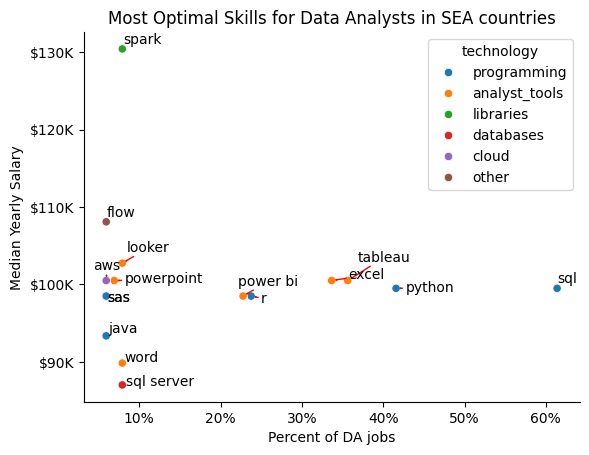

In [47]:
# Re-plot the scatter plot with a new legend

sns.scatterplot(
    data = df_plot,
    x = 'skill_perc',
    y= 'median_salary',
    hue = 'technology'
)
sns.despine()

# Prepare texts for adjustText
texts=[]
for i, txt in enumerate(df_plot['skills']):
    texts.append(plt.text(df_plot['skill_perc'].iloc[i],df_plot['median_salary'].iloc[i], txt))

# Adjust text to avoid overlaps
adjust_text(texts,arrowprops=dict(arrowstyle='->',color = 'red'))

# Set axis labels, title
plt.xlabel('Percent of DA jobs') 
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in SEA countries')

# Format X&Y axes' tick values
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'{int(x)}%'))